<a href="https://colab.research.google.com/github/SapientSapiens/ml-zoomcamp-2024/blob/main/homework/06/Homework06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fetching the Dataset

In [1]:
!wget https://github.com/alexeygrigorev/datasets/raw/refs/heads/master/jamb_exam_results.csv

--2024-11-04 20:33:08--  https://github.com/alexeygrigorev/datasets/raw/refs/heads/master/jamb_exam_results.csv
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/alexeygrigorev/datasets/refs/heads/master/jamb_exam_results.csv [following]
--2024-11-04 20:33:08--  https://raw.githubusercontent.com/alexeygrigorev/datasets/refs/heads/master/jamb_exam_results.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 391501 (382K) [text/plain]
Saving to: ‘jamb_exam_results.csv’

jamb_exam_results.c 100%[===================>] 382.33K  --.-KB/s    in 0.02s   

2024-11-04 20:33:08 (15.4 MB/s) - ‘jamb_exam_result

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#df=pd.read_csv('jamb_exam_results.csv', keep_default_na=False, na_values=['', 'NaN', 'null'])
df=pd.read_csv('jamb_exam_results.csv')

In [4]:
df.head()

,JAMB_Score,Study_Hours_Per_Week,Attendance_Rate,Teacher_Quality,Distance_To_School,School_Type,School_Location,Extra_Tutorials,Access_To_Learning_Materials,Parent_Involvement,IT_Knowledge,Student_ID,Age,Gender,Socioeconomic_Status,Parent_Education_Level,Assignments_Completed
0,192,22,78,4,12.4,Public,Urban,Yes,Yes,High,Medium,1,17,Male,Low,Tertiary,2
1,207,14,88,4,2.7,Public,Rural,No,Yes,High,High,2,15,Male,High,NaN,1
2,182,29,87,2,9.6,Public,Rural,Yes,Yes,High,Medium,3,20,Female,High,Tertiary,2
3,210,29,99,2,2.6,Public,Urban,No,Yes,Medium,High,4,22,Female,Medium,Tertiary,1
4,199,12,98,3,8.8,Public,Urban,No,Yes,Medium,Medium,5,22,Female,Medium,Tertiary,1


In [5]:
df.shape

(5000, 17)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   JAMB_Score                    5000 non-null   int64  
 1   Study_Hours_Per_Week          5000 non-null   int64  
 2   Attendance_Rate               5000 non-null   int64  
 3   Teacher_Quality               5000 non-null   int64  
 4   Distance_To_School            5000 non-null   float64
 5   School_Type                   5000 non-null   object 
 6   School_Location               5000 non-null   object 
 7   Extra_Tutorials               5000 non-null   object 
 8   Access_To_Learning_Materials  5000 non-null   object 
 9   Parent_Involvement            5000 non-null   object 
 10  IT_Knowledge                  5000 non-null   object 
 11  Student_ID                    5000 non-null   int64  
 12  Age                           5000 non-null   int64  
 13  Gen

# Preparing the dataset

In [7]:
# First, let's make the names lowercase:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [9]:
# Remove the student_id column.
del df['student_id']

In [10]:
#Checking for missing values
df.isnull().sum()

,0
jamb_score,0
study_hours_per_week,0
attendance_rate,0
teacher_quality,0
distance_to_school,0
school_type,0
school_location,0
extra_tutorials,0
access_to_learning_materials,0
parent_involvement,0


In [11]:
# before the fillna execution
df[df['parent_education_level'].isnull()]

,jamb_score,study_hours_per_week,attendance_rate,teacher_quality,distance_to_school,school_type,school_location,extra_tutorials,access_to_learning_materials,parent_involvement,it_knowledge,age,gender,socioeconomic_status,parent_education_level,assignments_completed
1,207,14,88,4,2.7,Public,Rural,No,Yes,High,High,15,Male,High,NaN,1
9,157,15,79,3,15.6,Public,Rural,No,Yes,Low,Low,20,Female,Medium,NaN,1
20,108,28,90,1,16.6,Public,Urban,No,Yes,Low,Low,20,Female,Low,NaN,2
23,207,20,73,3,5.6,Public,Urban,Yes,No,Medium,Medium,22,Male,Low,NaN,1
25,149,11,97,3,5.0,Public,Rural,No,Yes,Low,Medium,22,Female,Low,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4971,127,20,90,2,10.0,Private,Urban,Yes,Yes,Medium,High,21,Female,Low,NaN,1
4977,163,20,69,2,14.6,Public,Rural,Yes,No,Medium,Low,18,Female,Medium,NaN,2
4992,189,17,87,4,13.2,Private,Rural,Yes,Yes,Low,High,22,Male,Low,NaN,2
4993,200,17,89,3,5.8,Private,Urban,No,Yes,High,Low,18,Male,Low,NaN,1


In [12]:
# filling missing values with zero
df['parent_education_level'] = df['parent_education_level'].fillna(0)

In [13]:
# after the fillna execution
df[df['parent_education_level'].isnull()]

,jamb_score,study_hours_per_week,attendance_rate,teacher_quality,distance_to_school,school_type,school_location,extra_tutorials,access_to_learning_materials,parent_involvement,it_knowledge,age,gender,socioeconomic_status,parent_education_level,assignments_completed


#### Do train/validation/test split with 60%/20%/20% distribution

In [14]:
# import library for train test split
from sklearn.model_selection import train_test_split

In [15]:
# split original dataset into full_train and test
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [16]:
# split full_train dataset into train and validation
df_train, df_val = train_test_split(df_full_train, test_size=len(df_test), random_state=1)

In [17]:
# checking the splits
len(df_train), len(df_val), len(df_test)

(3000, 1000, 1000)

In [18]:
# resetting the indices of the datasets
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [19]:
# setting the target variable
y_train = df_train.jamb_score.values
y_val = df_val.jamb_score.values
y_test = df_test.jamb_score.values

In [20]:
# ensuring that the target variables jamb_score is not in the datasets
del df_train['jamb_score']
del df_val['jamb_score']
del df_test['jamb_score']

#### Use DictVectorizer(sparse=True) to turn the dataframes into matrices.

In [21]:
# importing libraries for One-hot-encoding
from sklearn.feature_extraction import DictVectorizer

In [22]:
# creating an instance of the DictVectorizer
dv = DictVectorizer(sparse=False)

In [23]:
# creating a dictionary from complete dataset of train dataset
train_dict = df_train.to_dict(orient='records')

In [24]:
# creating the final train dataset by one-hot-encoding the categorical values in the dataset
X_train = dv.fit_transform(train_dict)

In [25]:
# creating a dictionary from complete dataset of validation dataset
val_dict = df_val.to_dict(orient='records')

In [26]:
# creating the final validation dataset by one-hot-encoding the categorical values in the dataset
X_val = dv.transform(val_dict)

# Question 1

#### Let's train a decision tree regressor to predict the jamb_score variable.
     Train a model with max_depth=1.

In [27]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import roc_auc_score
from sklearn.tree import export_text

In [28]:
dt = DecisionTreeRegressor(max_depth=1)

In [29]:
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=1)

In [30]:
feature_names = list(dv.get_feature_names_out())

In [31]:
print(export_text(dt, feature_names=feature_names))

|--- study_hours_per_week <= 18.50
|   |--- value: [155.24]
|--- study_hours_per_week >  18.50
|   |--- value: [188.59]



### So we see ```study_hours_per_week``` is the fearure used for splitting the data



# Question 2

#### Train a random forest regressor with these parameters:
      

      *   n_estimators=10
      *   random_state=1
      *   n_jobs=-1 (optional - to make training faster)





In [32]:
from sklearn.ensemble import RandomForestRegressor

In [33]:
rf  = RandomForestRegressor(n_estimators=10, random_state=1, n_jobs=-1)

In [34]:
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, n_jobs=-1, random_state=1)

In [35]:
y_pred_Q2 = rf.predict(X_val)

In [36]:
from sklearn.metrics import mean_squared_error

In [37]:
rmse = np.sqrt(mean_squared_error(y_val, y_pred_Q2))

print("RMSE:", rmse)

RMSE: 42.13724207871227


### So we see the RMSE of this model on the validation data is ```42.13```



# Question 3

Now let's experiment with the n_estimators parameter

    Try different values of this parameter from 10 to 200 with step 10.
    Set random_state to 1.
    Evaluate the model on the validation dataset.

In [38]:
scores = []

for n in range(10, 201, 10):
  rf  = RandomForestRegressor(n_estimators=n, random_state=1, n_jobs=-1)
  rf.fit(X_train, y_train)
  y_pred_Q3 = rf.predict(X_val)
  rmse = np.sqrt(mean_squared_error(y_val, y_pred_Q3))

  scores.append((n,round(rmse, 3)))

In [39]:
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'rmse'])

Text(0.5, 1.0, 'RMSE vs n_estimators')

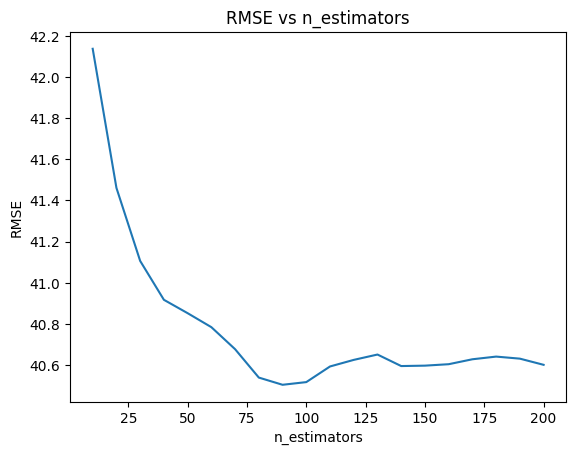

In [40]:
plt.plot(df_scores.n_estimators, df_scores.rmse)
plt.xlabel('n_estimators')
plt.ylabel('RMSE')
plt.title('RMSE vs n_estimators')

### So we can see that after n_estimator = ```80``` the RMSE stops improving







# Question 4

### Let's select the best max_depth:
    Try different values of max_depth: [10, 15, 20, 25]

    For each of these values,
        try different values of n_estimators from 10 till 200 (with step 10)
        calculate the mean RMSE
        
    Fix the random seed: random_state=1

In [41]:
scores_Q4 = []

for d in [10, 15, 20, 25]:
  for n in range(10, 201, 10):
    rf  = RandomForestRegressor(n_estimators=n, random_state=1, n_jobs=-1, max_depth=d)
    rf.fit(X_train, y_train)
    y_pred_Q4 = rf.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred_Q4))

    scores_Q4.append((d, n, rmse))

In [42]:
columns = ['max_depth', 'n_estimators', 'rmse']
df_scores_Q4 = pd.DataFrame(scores_Q4, columns=columns)

In [44]:
df_scores_Q4.groupby('max_depth').rmse.mean()

,rmse
max_depth,
10,40.392498
15,40.735282
20,40.739734
25,40.787866


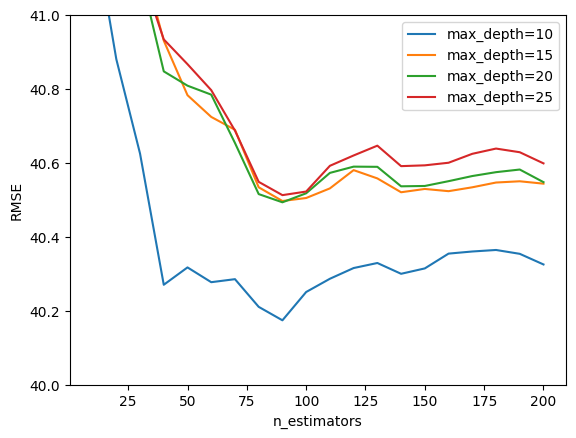

In [45]:
for d in [10, 15, 20, 25]:
    df_subset = df_scores_Q4[df_scores_Q4.max_depth == d]

    plt.plot(df_subset.n_estimators, df_subset.rmse,
             label='max_depth=%d' % d)

plt.xlabel('n_estimators')
plt.ylabel('RMSE')
plt.ylim(40, 41)
plt.legend()

### So we can see that using the mean RMSE, the best max_depth is ```10```

# Question 5

#### We can extract feature importance information from tree-based models.

At each step of the decision tree learning algorithm, it finds the best split. When doing it, we can calculate "gain" - the reduction in impurity before and after the split. This gain is quite useful in understanding what are the important features for tree-based models.


*In Scikit-Learn, tree-based models contain this information in the feature_importances_ field.*

For this homework question, we'll find the most important feature:

    Train the model with these parameters:
    n_estimators=10,
    max_depth=20,
    random_state=1,
    n_jobs=-1 (optional)

Get the feature importance information from this model

In [46]:
rf  = RandomForestRegressor(n_estimators=10, random_state=1, n_jobs=-1, max_depth=20)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, n_estimators=10, n_jobs=-1, random_state=1)

In [47]:
# Extract feature importances
importances = rf.feature_importances_

In [48]:
importances

array([0.0123254 , 0.01026189, 0.06931145, 0.03151679, 0.14972903,
       0.1364858 , 0.01345934, 0.00913136, 0.00928871, 0.01038263,
       0.01771934, 0.01240405, 0.00914148, 0.        , 0.01545036,
       0.01695692, 0.01448862, 0.02291885, 0.01335761, 0.01149201,
       0.00955909, 0.00923932, 0.0089532 , 0.00840598, 0.02571426,
       0.01070798, 0.01056268, 0.24835361, 0.08268222])

In [49]:
# Find the most important feature
most_important_index = importances.argmax()  # get the index of the highest importance
most_important_feature = feature_names[most_important_index]  # map to feature name
importance_value = importances[most_important_index]  # get the importance score

print(f"The most important feature is '{most_important_feature}' with an importance score of {importance_value:.4f}")

The most important feature is 'study_hours_per_week' with an importance score of 0.2484


### So we can see that the most important feature is ```study_hours_per_week```



# Question 6

Now let's train an XGBoost model! For this question, we'll tune the eta parameter:

    Install XGBoost

    Create DMatrix for train and validation

    Create a watchlist

    Train a model with these parameters for 100 rounds:
    xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
    }

#### Now change eta from 0.3 to 0.1.

In [50]:
!pip install xgboost

In [51]:
import xgboost as xgb

In [52]:
# getting the feature list
features = list(dv.get_feature_names_out())

In [53]:
# Train a model with these parameters for 100 rounds:
num_rounds = 100

In [54]:
# creating DMatrix for train
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)

In [55]:
# creating DMatrix for validation
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [56]:
# creating a watchlist
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [57]:
# Set xgb parameters
xgb_params = {
    'eta': 0.3,                # Initial eta
    'max_depth': 6,
    'min_child_weight': 1,
    'objective': 'reg:squarederror',
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

In [58]:
# Train the model with eta=0.3
model_eta_03 = xgb.train(xgb_params, dtrain, num_boost_round=num_rounds, verbose_eval=2, evals=watchlist)

[0]	train-rmse:42.69552	val-rmse:44.86028
[2]	train-rmse:37.95285	val-rmse:41.83772
[4]	train-rmse:35.36066	val-rmse:41.02965
[6]	train-rmse:33.71528	val-rmse:40.69132
[8]	train-rmse:32.41772	val-rmse:40.72710
[10]	train-rmse:31.55119	val-rmse:40.83684
[12]	train-rmse:30.33163	val-rmse:41.05515
[14]	train-rmse:29.44279	val-rmse:41.32160
[16]	train-rmse:28.84106	val-rmse:41.45737
[18]	train-rmse:27.90071	val-rmse:41.55139
[20]	train-rmse:27.24424	val-rmse:41.80313
[22]	train-rmse:26.64232	val-rmse:41.90488
[24]	train-rmse:25.88532	val-rmse:42.08362
[26]	train-rmse:25.27021	val-rmse:42.18007
[28]	train-rmse:24.50666	val-rmse:42.17218
[30]	train-rmse:24.12906	val-rmse:42.28557
[32]	train-rmse:23.61943	val-rmse:42.34086
[34]	train-rmse:22.76960	val-rmse:42.41263
[36]	train-rmse:22.21200	val-rmse:42.53387
[38]	train-rmse:21.88417	val-rmse:42.64574
[40]	train-rmse:21.45994	val-rmse:42.77917
[42]	train-rmse:21.09028	val-rmse:42.79428
[44]	train-rmse:20.65221	val-rmse:42.92877
[46]	train-rmse:

In [63]:
# Calculate RMSE for eta=0.3
preds_eta_03 = model_eta_03.predict(dval)
rmse_eta_03 = np.sqrt(mean_squared_error(y_val, preds_eta_03))
print(f"RMSE with eta=0.3: {rmse_eta_03:.4f}")

RMSE with eta=0.3: 44.4321


In [64]:
# Update eta to 0.1
xgb_params['eta'] = 0.1

In [66]:
# Train the model with eta=0.1
model_eta_01 = xgb.train(xgb_params, dtrain, num_boost_round=num_rounds, verbose_eval=2, evals=watchlist)

[0]	train-rmse:45.50072	val-rmse:46.99373
[2]	train-rmse:42.92815	val-rmse:45.01746
[4]	train-rmse:40.94238	val-rmse:43.62411
[6]	train-rmse:39.43451	val-rmse:42.64605
[8]	train-rmse:38.17103	val-rmse:42.00035
[10]	train-rmse:37.11353	val-rmse:41.55631
[12]	train-rmse:36.26337	val-rmse:41.18307
[14]	train-rmse:35.45796	val-rmse:40.89024
[16]	train-rmse:34.73181	val-rmse:40.60601
[18]	train-rmse:34.13466	val-rmse:40.43780
[20]	train-rmse:33.57997	val-rmse:40.37859
[22]	train-rmse:33.08144	val-rmse:40.31700
[24]	train-rmse:32.67941	val-rmse:40.24539
[26]	train-rmse:32.34352	val-rmse:40.18931
[28]	train-rmse:31.87260	val-rmse:40.17918
[30]	train-rmse:31.47315	val-rmse:40.20963
[32]	train-rmse:31.14061	val-rmse:40.18380
[34]	train-rmse:30.87401	val-rmse:40.19533
[36]	train-rmse:30.51937	val-rmse:40.16657
[38]	train-rmse:30.15893	val-rmse:40.11076
[40]	train-rmse:29.89807	val-rmse:40.15747
[42]	train-rmse:29.68555	val-rmse:40.18541
[44]	train-rmse:29.44768	val-rmse:40.21938
[46]	train-rmse:

In [67]:
# Calculate RMSE for eta=0.1
preds_eta_01 = model_eta_01.predict(dval)
rmse_eta_01 = np.sqrt(mean_squared_error(y_val, preds_eta_01))
print(f"RMSE with eta=0.1: {rmse_eta_01:.4f}")

RMSE with eta=0.1: 41.0434


#### So we can see that setting eta to ```0.1``` leads to the best/better RMSE score



## Further, trying to plot the num_iter vs rmse graph for train and validation  for each eta viz 0.3 & 0.1

Note: I have to do this after the RMSE value prints as capturing notebook  
      output to StingIO buffer disables normal output showing in the collab notebook

In [68]:
import io
import sys

# Set xgb parameters
xgb_params = {
    'eta': 0.3,                # Initial eta
    'max_depth': 6,
    'min_child_weight': 1,
    'objective': 'reg:squarederror',
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

# Capture output using io.StringIO
output_capture = io.StringIO()
sys.stdout = output_capture  # Redirect stdout to the StringIO buffer

# Train the model with eta=0.3
model_eta_03 = xgb.train(xgb_params, dtrain, num_boost_round=num_rounds, verbose_eval=2, evals=watchlist)

# Reset stdout
sys.stdout = sys.__stdout__

# Retrieve and print the captured output
captured_output = output_capture.getvalue()
print(captured_output)

In [69]:
# function to parse the output into a dataframe
def parse_xgb_output(output):
    results = []

    for line in output.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))

    columns = ['num_iter', 'train_rmse', 'val_rmse']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [70]:
captured_output

'[0]\ttrain-rmse:42.69552\tval-rmse:44.86028\n[2]\ttrain-rmse:37.95285\tval-rmse:41.83772\n[4]\ttrain-rmse:35.36066\tval-rmse:41.02965\n[6]\ttrain-rmse:33.71528\tval-rmse:40.69132\n[8]\ttrain-rmse:32.41772\tval-rmse:40.72710\n[10]\ttrain-rmse:31.55119\tval-rmse:40.83684\n[12]\ttrain-rmse:30.33163\tval-rmse:41.05515\n[14]\ttrain-rmse:29.44279\tval-rmse:41.32160\n[16]\ttrain-rmse:28.84106\tval-rmse:41.45737\n[18]\ttrain-rmse:27.90071\tval-rmse:41.55139\n[20]\ttrain-rmse:27.24424\tval-rmse:41.80313\n[22]\ttrain-rmse:26.64232\tval-rmse:41.90488\n[24]\ttrain-rmse:25.88532\tval-rmse:42.08362\n[26]\ttrain-rmse:25.27021\tval-rmse:42.18007\n[28]\ttrain-rmse:24.50666\tval-rmse:42.17218\n[30]\ttrain-rmse:24.12906\tval-rmse:42.28557\n[32]\ttrain-rmse:23.61943\tval-rmse:42.34086\n[34]\ttrain-rmse:22.76960\tval-rmse:42.41263\n[36]\ttrain-rmse:22.21200\tval-rmse:42.53387\n[38]\ttrain-rmse:21.88417\tval-rmse:42.64574\n[40]\ttrain-rmse:21.45994\tval-rmse:42.77917\n[42]\ttrain-rmse:21.09028\tval-rmse:42

In [71]:
df_score_03 = parse_xgb_output(captured_output)

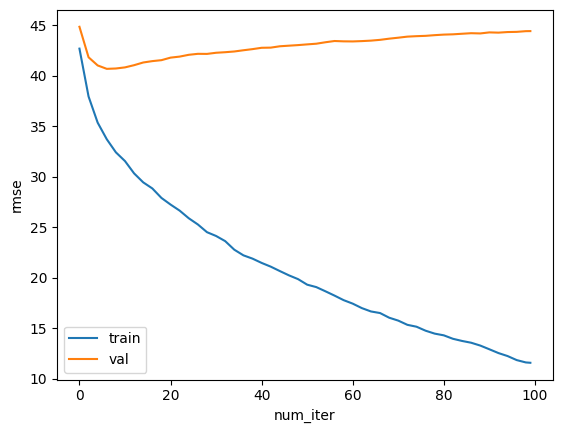

In [72]:
plt.plot(df_score_03.num_iter, df_score_03.train_rmse, label='train')
plt.plot(df_score_03.num_iter, df_score_03.val_rmse, label='val')
plt.xlabel('num_iter')
plt.ylabel('rmse')
plt.legend()

In [73]:
# Update eta to 0.1
xgb_params['eta'] = 0.1

In [75]:
# Capture output using io.StringIO
output_capture_01 = io.StringIO()
sys.stdout = output_capture_01  # Redirect stdout to the StringIO buffer

# Train the model with eta=0.3
model_eta_01 = xgb.train(xgb_params, dtrain, num_boost_round=num_rounds, verbose_eval=2, evals=watchlist)

# Reset stdout
sys.stdout = sys.__stdout__

# Retrieve and print the captured output
captured_output_01 = output_capture_01.getvalue()
print(captured_output_01)

In [76]:
captured_output_01

'[0]\ttrain-rmse:45.50072\tval-rmse:46.99373\n[2]\ttrain-rmse:42.92815\tval-rmse:45.01746\n[4]\ttrain-rmse:40.94238\tval-rmse:43.62411\n[6]\ttrain-rmse:39.43451\tval-rmse:42.64605\n[8]\ttrain-rmse:38.17103\tval-rmse:42.00035\n[10]\ttrain-rmse:37.11353\tval-rmse:41.55631\n[12]\ttrain-rmse:36.26337\tval-rmse:41.18307\n[14]\ttrain-rmse:35.45796\tval-rmse:40.89024\n[16]\ttrain-rmse:34.73181\tval-rmse:40.60601\n[18]\ttrain-rmse:34.13466\tval-rmse:40.43780\n[20]\ttrain-rmse:33.57997\tval-rmse:40.37859\n[22]\ttrain-rmse:33.08144\tval-rmse:40.31700\n[24]\ttrain-rmse:32.67941\tval-rmse:40.24539\n[26]\ttrain-rmse:32.34352\tval-rmse:40.18931\n[28]\ttrain-rmse:31.87260\tval-rmse:40.17918\n[30]\ttrain-rmse:31.47315\tval-rmse:40.20963\n[32]\ttrain-rmse:31.14061\tval-rmse:40.18380\n[34]\ttrain-rmse:30.87401\tval-rmse:40.19533\n[36]\ttrain-rmse:30.51937\tval-rmse:40.16657\n[38]\ttrain-rmse:30.15893\tval-rmse:40.11076\n[40]\ttrain-rmse:29.89807\tval-rmse:40.15747\n[42]\ttrain-rmse:29.68555\tval-rmse:40

In [78]:
df_score_04 = parse_xgb_output(captured_output_01)

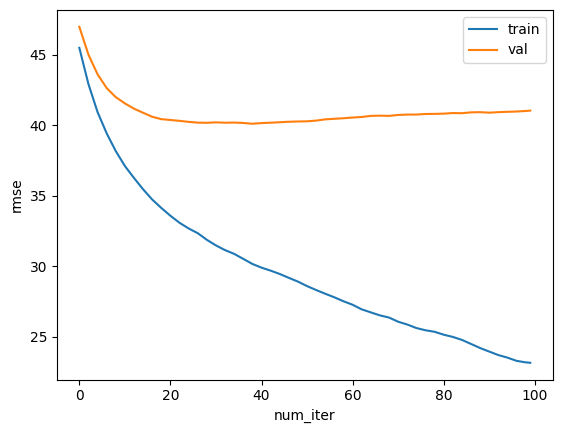

In [79]:
plt.plot(df_score_04.num_iter, df_score_04.train_rmse, label='train')
plt.plot(df_score_04.num_iter, df_score_04.val_rmse, label='val')
plt.xlabel('num_iter')
plt.ylabel('rmse')
plt.legend()

#### So even the plots we can also see that a better RMSE is given by setting eta to ```0.1```

